# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [4]:
import seaborn as sns
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

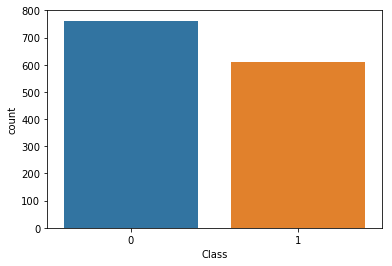

In [5]:
sns.countplot(x='Class',data=df)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

/opt/anaconda3/envs/tensorflow/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/envs/tensorflow/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/anaconda3/envs/tensorflow/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


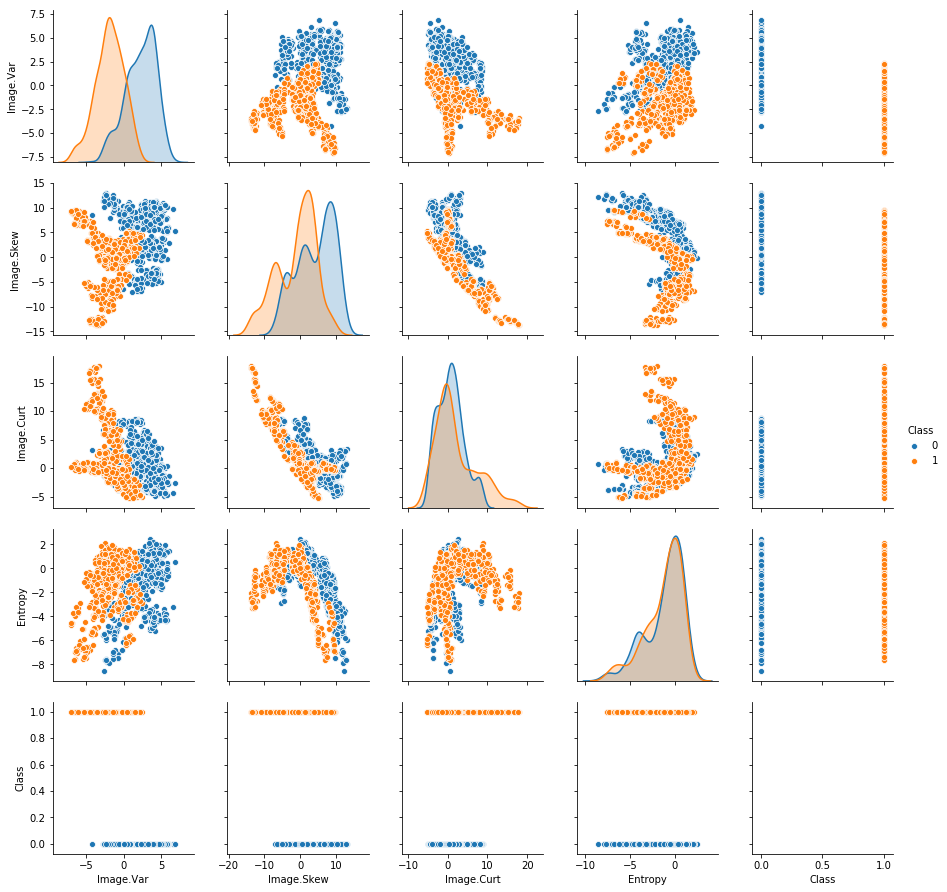

In [6]:
sns.pairplot(df,hue='Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [7]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [8]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [9]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [10]:
scaled_features = scaler.fit_transform(df.drop('Class',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [12]:
X = df_feat
y = df['Class']

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [13]:
X = X.values
y = y.values

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 700)
y_test  = (y_test==1).astype(np.int32)
y_train = (y_train==1).astype(np.int32)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [16]:
import tensorflow as tf
import tensorflow.contrib.learn as learn

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [19]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)]
classifier = learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=2)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 0, '_task_type': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_save_checkpoints_steps': None, '_environment': 'local', '_model_dir': '/var/folders/23/kw8xnnl1053djbl74969qjnw0000gn/T/tmpz854o3qj', '_keep_checkpoint_max': 5, '_num_ps_replicas': 0, '_session_config': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_device_fn': None, '_is_chief': True, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_train_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterS

** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [20]:
classifier.fit(X_train, y_train, steps=200, batch_size=20)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to the Estimator interface.
Instructions for up

DNNClassifier(params={'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),), 'input_layer_min_slice_size': None, 'optimizer': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7ffa03f1eac8>, 'gradient_clip_norm': None, 'dropout': None, 'embedding_lr_multipliers': None, 'activation_fn': <function relu at 0x7ffa0a1e16a8>})

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [21]:
y_predict = classifier.predict_classes(X_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/23/kw8xnnl1053djbl74969qjnw0000gn/T/tmpz854o3qj/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

오류를 해결할 수가 없습니다.

In [ ]:
print(confusion_matrix(y_test,y_predict))

In [ ]:
print(classification_report(y_test,y_predict))

## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rc = RandomForestClassifier()

In [27]:
rc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_predict = rc.predict(X_test)

In [29]:
print(confusion_matrix(y_test,y_predict))

[[229   1]
 [  2 180]]


In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       230
           1       0.99      0.99      0.99       182

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!